In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy import stats
from scipy.stats import linregress

from sklearn.linear_model import LinearRegression


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[:5]

['hithadhoo', 'kaeo', 'broome', 'margate', 'butaritari']

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city1 = 'jamestown'
query1=f"{url}appid={weather_api_key}&units={units}&q=" 
output = requests.get(query1+city1).json()
print(output)


{'coord': {'lon': -79.24, 'lat': 42.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.47, 'feels_like': 82.22, 'temp_min': 77, 'temp_max': 81, 'pressure': 1022, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 0}, 'clouds': {'all': 90}, 'dt': 1595701122, 'sys': {'type': 1, 'id': 4588, 'country': 'US', 'sunrise': 1595671418, 'sunset': 1595724182}, 'timezone': -14400, 'id': 5122534, 'name': 'Jamestown', 'cod': 200}


In [4]:
lat = []
temp = []
long = []
hum = []
city_name = []
cloud = []
wind = []
country = []
date = []



# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        long.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        print(city)
    except:
            print("city not found")
            


#complete this later


hithadhoo
kaeo
broome
margate
butaritari
rio grande
madimba
sunrise manor
kristinehamn
city not found
lavrentiya
iquitos
busselton
leningradskiy
mosetse
jodiya
labuan
ilulissat
nicoya
ushuaia
chara
moron
coquimbo
half moon bay
darab
souillac
codrington
kodiak
yeppoon
vila velha
mahebourg
prince rupert
popova
periyanayakkanpalaiyam
bluff
carnarvon
charters towers
airai
lebu
hilo
provideniya
qasigiannguit
geraldton
chuy
bilibino
flin flon
gizo
puerto ayora
east london
zhongxing
rikitea
tarakan
nakhon luang
bambanglipuro
ribeira brava
saint-augustin
saskylakh
richards bay
belomorsk
bershet
katsuura
mataura
maningrida
qaanaaq
sao filipe
faanui
arraial do cabo
iqaluit
safaga
san quintin
vaini
padilla
birao
muana
tual
kruisfontein
atuona
lompoc
hobart
ribeira grande
la ronge
chokurdakh
bheramara
avarua
aleksandrov gay
jamestown
lazaro cardenas
upernavik
tyrma
dahuk
namibe
ponta do sol
city not found
tecoanapa
comodoro rivadavia
virginia beach
tuktoyaktuk
khatanga
kapaa
lagoa
port hedland
cap

In [5]:
cities_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": long, "Max Temp": temp, "Humidity": hum, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date })
len(cities)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.60,73.08,82.40,74,100,15.41,MV,1595701332
1,kaeo,-35.10,173.78,45.00,3,2,1.99,NZ,1595701332
2,broome,42.25,-75.83,82.76,51,20,3.36,US,1595701332
3,margate,51.38,1.39,63.00,99,100,4.00,GB,1595701275
4,butaritari,3.07,172.79,83.30,73,14,16.02,KI,1595701333


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = cities_df[cities_df["Humidity"].astype(float) < 100]
clean_city_data.head()





,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.60,73.08,82.40,74,100,15.41,MV,1595701332
1,kaeo,-35.10,173.78,45.00,3,2,1.99,NZ,1595701332
2,broome,42.25,-75.83,82.76,51,20,3.36,US,1595701332
3,margate,51.38,1.39,63.00,99,100,4.00,GB,1595701275
4,butaritari,3.07,172.79,83.30,73,14,16.02,KI,1595701333


In [21]:
#export dataframe to csv

clean_city_data.to_csv("clean_city_data", header = True , index = True )


Text(0.5, 1.0, 'Temperature(F) vs Latitude')

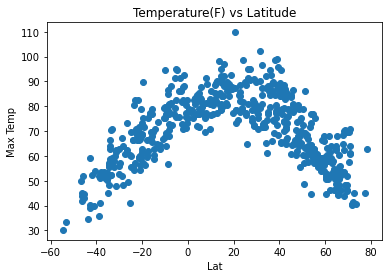

In [7]:
#Your first requirement is to create a series of scatter plots to showcase the following relationships:

#Temperature (F) vs. Latitude

plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Temperature(F) vs Latitude")

Text(0.5, 1.0, 'Humidity vs Latitude')

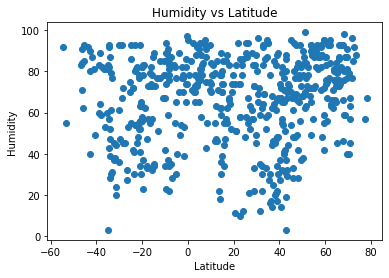

In [8]:
# Humidity (%) vs. Latitude
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude")




Text(0.5, 1.0, 'Cloudiness vs Latitude')

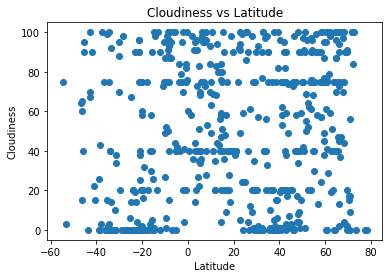

In [9]:
# Cloudiness (%) vs. Latitude
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude")



Text(0.5, 1.0, 'Cloudiness vs Latitude')

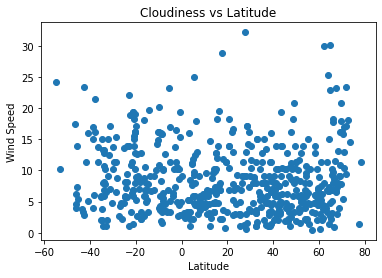

In [10]:
#Wind Speed (mph) vs. Latitude
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Cloudiness vs Latitude")

In [11]:
#Create new dataframe, one southern and one northern hemisphere
northern = clean_city_data[clean_city_data["Lat"].between(0, 90)]

southern = clean_city_data[clean_city_data["Lat"].between(-90, 0)]
northern.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,broome,42.25,-75.83,82.76,51,20,3.36,US,1595701332
3,margate,51.38,1.39,63.00,99,100,4.00,GB,1595701275
4,butaritari,3.07,172.79,83.30,73,14,16.02,KI,1595701333
7,sunrise manor,36.21,-115.07,92.64,17,1,5.23,US,1595701212
8,kristinehamn,59.31,14.11,65.88,55,77,10.29,SE,1595701334


The correlation coefficient between both factors is -0.73


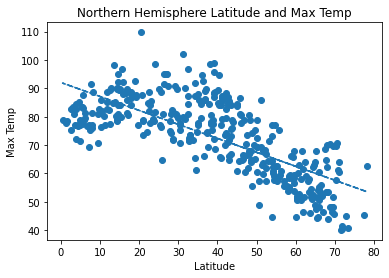

The correlation coefficient between both factors is 0.09


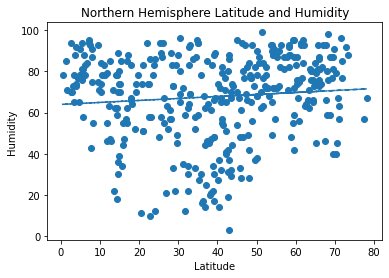

The correlation coefficient between both factors is 0.01


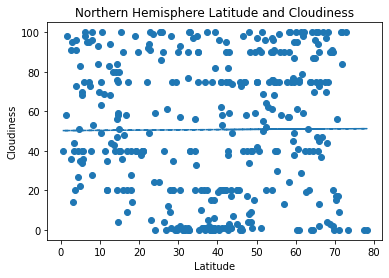

The correlation coefficient between both factors is 0.1


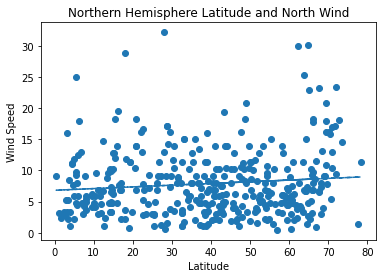

The correlation coefficient between both factors is 0.82
The correlation coefficient between both factors is 0.82


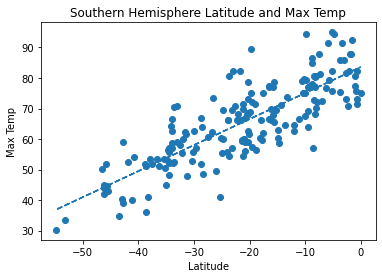

The correlation coefficient between both factors is 0.02


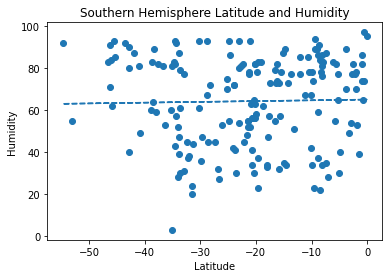

The correlation coefficient between both factors is 0.25


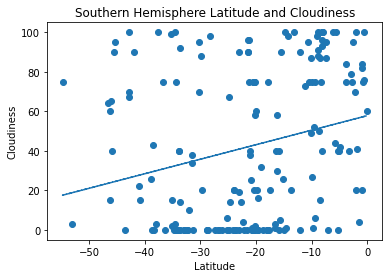

The correlation coefficient between both factors is -0.05


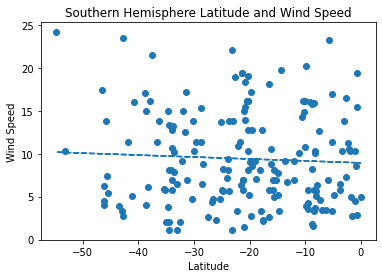

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
import scipy.stats as st

#Below I wrote out both linear regressions for coefficients, and then for linear regressions and r squared.


North_Lat = northern["Lat"]
North_MaxTemp = northern["Max Temp"]
North_Hum = northern["Humidity"]
North_Cloud = northern["Cloudiness"]
North_Wind = northern["Wind Speed"]

temp_slope, temp_int, temp_r, temp_p, temp_std_err = stats.linregress(North_Lat, North_MaxTemp)
temp_fit = temp_slope * North_Lat + temp_int

hum_slope, hum_int, hum_r, hum_p, hum_std_err = stats.linregress(North_Lat, North_Hum)
hum_fit = hum_slope * North_Lat + hum_int

cloud_slope, cloud_int, cloud_r, cloud_p, cloud_std_err = stats.linregress(North_Lat, North_Cloud)
cloud_fit = cloud_slope * North_Lat + cloud_int

wind_slope, wind_int, wind_r, wind_p, wind_std_err = stats.linregress(North_Lat, North_Wind)
wind_fit = wind_slope * North_Lat + wind_int

#Scatterplot for Temp

plt.scatter(North_Lat, North_MaxTemp)
plt.plot(North_Lat, temp_fit, "--")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere Latitude and Max Temp")
correlation = st.pearsonr(North_Lat, North_MaxTemp)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")
plt.show()



#Scatterplot for Humidity
plt.scatter(North_Lat, North_Hum)
plt.plot(North_Lat, hum_fit, "--")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere Latitude and Humidity")
correlation = st.pearsonr(North_Lat, North_Hum)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")
plt.show()



#Scatterplot for Cloudiness
plt.scatter(North_Lat, North_Cloud)
plt.plot(North_Lat, cloud_fit, "--")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere Latitude and Cloudiness")
correlation = st.pearsonr(North_Lat, North_Cloud)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")
plt.show()

plt.scatter(North_Lat, North_Wind)
plt.plot(North_Lat, wind_fit, "--")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere Latitude and North Wind")
correlation = st.pearsonr(North_Lat, North_Wind)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")
plt.show()


#Southern Hemisphere Plots

South_Lat = southern["Lat"]
South_MaxTemp = southern["Max Temp"]
South_Hum = southern["Humidity"]
South_Cloud = southern["Cloudiness"]
South_Wind = southern["Wind Speed"]
correlation = st.pearsonr(South_Lat, South_MaxTemp)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

stemp_slope, stemp_int, stemp_r, stemp_p, stemp_std_err = stats.linregress(South_Lat, South_MaxTemp)
stemp_fit = stemp_slope * South_Lat + stemp_int

shum_slope, shum_int, shum_r, shum_p, shum_std_err = stats.linregress(South_Lat, South_Hum)
shum_fit = shum_slope * South_Lat + shum_int

scloud_slope, scloud_int, scloud_r, scloud_p, scloud_std_err = stats.linregress(South_Lat, South_Cloud)
scloud_fit = scloud_slope * South_Lat + scloud_int

swind_slope, swind_int, swind_r, swind_p, swind_std_err = stats.linregress(South_Lat, South_Wind)
swind_fit = swind_slope * South_Lat + swind_int

#Scatterplot for Temp

plt.scatter(South_Lat, South_MaxTemp)
plt.plot(South_Lat, stemp_fit, "--")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere Latitude and Max Temp")
correlation = st.pearsonr(South_Lat, South_MaxTemp)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")
plt.show()


#Scatterplot for Humidity
plt.scatter(South_Lat, South_Hum)
plt.plot(South_Lat, shum_fit, "--")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere Latitude and Humidity")
correlation = st.pearsonr(South_Lat, South_Hum)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")
plt.show()

#Scatterplot for Cloudiness
plt.scatter(South_Lat, South_Cloud)
plt.plot(South_Lat, scloud_fit, "--")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere Latitude and Cloudiness")
correlation = st.pearsonr(South_Lat, South_Cloud)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")
plt.show()

plt.scatter(South_Lat, South_Wind)
plt.plot(South_Lat, swind_fit, "--")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere Latitude and Wind Speed")
correlation = st.pearsonr(South_Lat, South_Wind)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")
plt.show()


#I TRIED TO FIGURE OUT HOW TO SHOW THESE SCATTERPLOTS ON MULTIPLE AXES BELOW BUT WASN'T ABLE TO DO IT...THOUGHT
# I WOULD SHOW MY EFFORT BELOW ANYWAYS. What I did here was to replicate the method from Activity 9 Day 3 of Matplotlib, the 'Crime' activity,
#so that I wouldn't have to do separate linear regressions for each visualization. It ended up taking a lot of time
#actually and not really working very well so I've commented it out.

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
#fig.suptitle("Temp, Humidity, Cloudiness and Windspeed over Latitude in Northern Hemisphere", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(0), max(1000))
#ax1.plot(North_Lat, North_MaxTemp, linewidth=1, marker="o")
#ax1.plot(year, temp_fit, "b--", linewidth=1)
#ax1.set_ylabel("Temperature and Latitude")

#ax2.set_xlim(min(North_Lat), max(North_Lat))
#ax2.plot(North_Lat, North_Hum, linewidth=1, marker="o", color="r")
#ax2.plot(North_Lat, hum_fit, "r--", linewidth=1)
#ax2.set_ylabel("Humidity and Latitude")

#ax3.set_xlim(min(North_Lat), max(North_Lat))
#ax3.plot(North_Lat, North_Cloud, linewidth=1, marker="o", color="g")
#ax3.plot(North_Lat, cloud_fit, "g--", linewidth=1)
#ax3.set_ylabel("Cloudiness and Latitude")
     
#ax4.set_xlim(min(North_Lat), max(North_Lat))
#ax4.plot(North_Lat, North_Wind, linewidth=1, marker="o", color="g")
#ax4.plot(North_Lat, wind_fit, "g--", linewidth=1)
#ax4.set_ylabel("Windspeed and Latitude")             
#ax4.set_xlabel("Latitude")

#plt.show()





The r-squared is: 0.5321306124511846


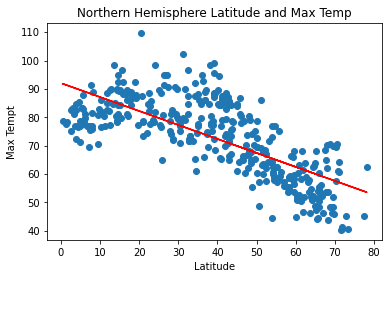

The r-squared is: 0.008833061837397335


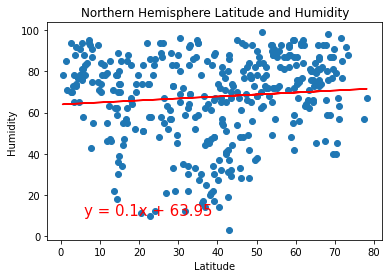

The r-squared is: 5.551235813489839e-05


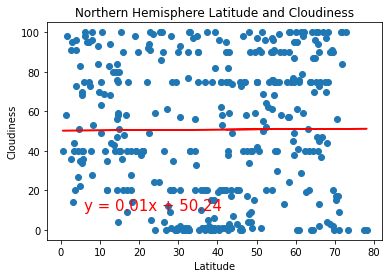

The r-squared is: 0.010789250387227419


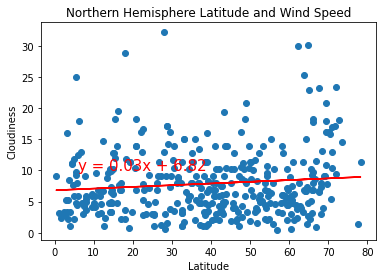

The r-squared is: 0.6757492009709626


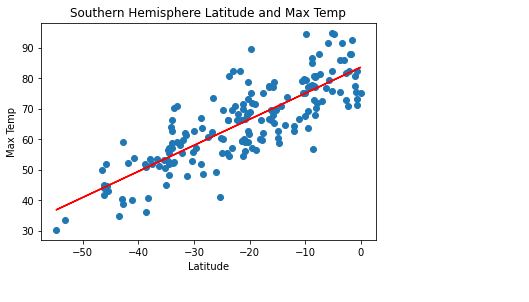

The r-squared is: 0.6757492009709626


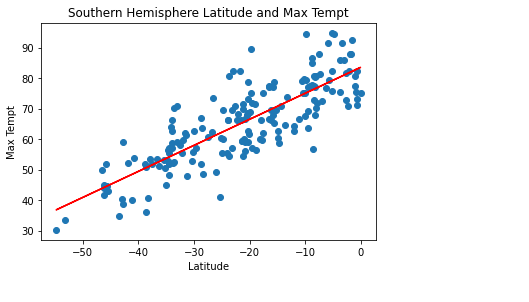

The r-squared is: 0.0005060670860499623


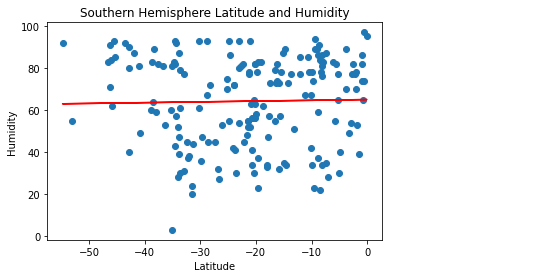

The r-squared is: 0.06152656640958964


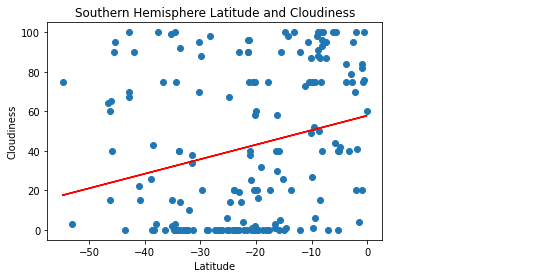

The r-squared is: 0.0028848993445065234


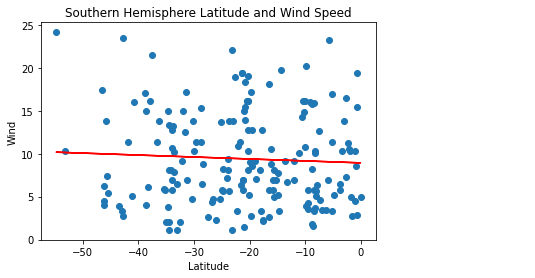

In [13]:
North_Lat = northern["Lat"]
North_MaxTemp = northern["Max Temp"]
North_Hum = northern["Humidity"]
North_Cloud = northern["Cloudiness"]
North_Wind = northern["Wind Speed"]


South_Lat = southern["Lat"]
South_MaxTemp = southern["Max Temp"]
South_Hum = southern["Humidity"]
South_Cloud = southern["Cloudiness"]
South_Wind = southern["Wind Speed"]


x_values = North_Lat
y_values = North_MaxTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Tempt')
plt.title("Northern Hemisphere Latitude and Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()


x_values = North_Lat
y_values = North_Hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere Latitude and Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()


x_values = North_Lat
y_values = North_Cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Latitude and Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

x_values = North_Lat
y_values = North_Wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Latitude and Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Southern Hemisphere

x_values = South_Lat
y_values = South_MaxTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere Latitude and Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()


x_values = South_Lat
y_values = South_MaxTemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Tempt')
plt.title("Southern Hemisphere Latitude and Max Tempt")
print(f"The r-squared is: {rvalue**2}")
plt.show()


x_values = South_Lat
y_values = South_Hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere Latitude and Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()



x_values = South_Lat
y_values = South_Cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude and Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

x_values = South_Lat
y_values = South_Wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.title("Southern Hemisphere Latitude and Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()
